
Original Column Names: ['Project_ID', 'Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth', 'Weather_Index', 'Construction_Cost']

Updated Column Names: ['project_id', 'building_height', 'material_quality_index', 'labor_cost', 'concrete_strength', 'foundation_depth', 'weather_index', 'construction_cost']

R-squared Comparison:
Simple Linear Regression R²: 0.9154
Multiple Linear Regression R²: 0.9989
Adjusted R² for Multiple Regression: 0.9988

✅ Multiple Linear Regression performs better than Simple Linear Regression.

Multicollinearity Analysis (VIF):
             Feature       VIF
0    building_height  4.786453
1         labor_cost  6.737538
2  concrete_strength  7.509341
3   foundation_depth  5.385605


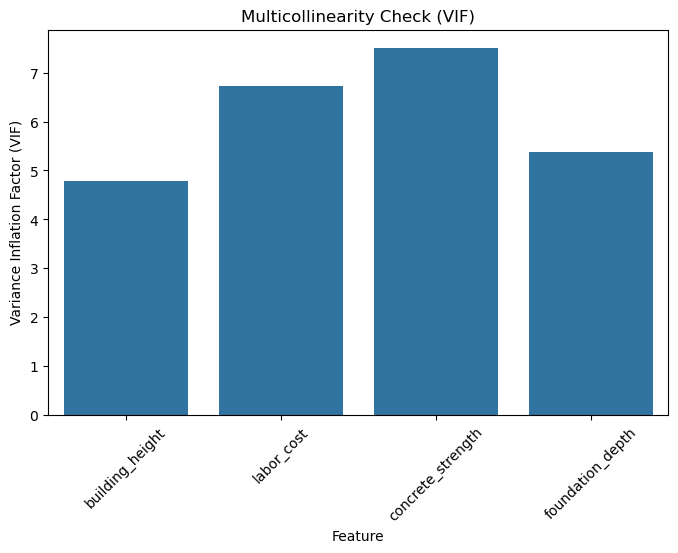

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Print original column names to identify mismatches
print("\nOriginal Column Names:", df.columns.tolist())

# Standardize column names (removes spaces, converts to lowercase, replaces special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Print updated column names
print("\nUpdated Column Names:", df.columns.tolist())

# Ensure dependent variable exists
if 'construction_cost' not in df.columns:
    raise KeyError("Column 'construction_cost' not found in dataset!")

# Define independent variable candidates
X_candidates = ['building_height', 'material_quality', 'labor_cost', 'concrete_strength', 'foundation_depth']

# Check which columns actually exist in the dataset
X_columns = [col for col in X_candidates if col in df.columns]

if not X_columns:
    raise KeyError("None of the expected independent variables were found in the dataset!")

# Define variables for Simple & Multiple Linear Regression
X_simple = df[['building_height']] if 'building_height' in df.columns else None
X_multiple = df[X_columns]
y = df['construction_cost']

# Simple Linear Regression Model (if 'building_height' exists)
if X_simple is not None:
    simple_model = LinearRegression()
    simple_model.fit(X_simple, y)
    y_pred_simple = simple_model.predict(X_simple)
    r2_simple = r2_score(y, y_pred_simple)
else:
    r2_simple = None
    print("\n⚠️ 'building_height' not found. Skipping Simple Linear Regression.")

# Multiple Linear Regression Model
multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y)
y_pred_multiple = multiple_model.predict(X_multiple)
r2_multiple = r2_score(y, y_pred_multiple)

# Adjusted R² Calculation
n = len(y)  # Number of observations
p = X_multiple.shape[1]  # Number of independent variables
adjusted_r2 = 1 - ((1 - r2_multiple) * (n - 1) / (n - p - 1))

# Calculate Variance Inflation Factor (VIF) for Multicollinearity Check
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multiple.columns
vif_data["VIF"] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]

# Print Results
print("\nR-squared Comparison:")
if r2_simple is not None:
    print(f"Simple Linear Regression R²: {r2_simple:.4f}")
print(f"Multiple Linear Regression R²: {r2_multiple:.4f}")
print(f"Adjusted R² for Multiple Regression: {adjusted_r2:.4f}")

if r2_simple is not None and r2_multiple > r2_simple:
    print("\n✅ Multiple Linear Regression performs better than Simple Linear Regression.")
else:
    print("\n⚠️ Simple Linear Regression might be sufficient.")

# Multicollinearity Check
print("\nMulticollinearity Analysis (VIF):")
print(vif_data)

# Plot VIF values
plt.figure(figsize=(8, 5))
sns.barplot(x="Feature", y="VIF", data=vif_data)
plt.xticks(rotation=45)
plt.ylabel("Variance Inflation Factor (VIF)")
plt.title("Multicollinearity Check (VIF)")
plt.show()
